## Clustering and dimensionaliy reduction

![title](MachineLearningDiagram.png)

## Clustering, cluster analysis

Мотивация: нахождение групп похожих объектов среди множества объектов

Вход:
* Какое-то количество (лучше больше) исследуемых объектов
* Мера «похожести» этих объектов

Выход:
* Группировка этих объектов в классы, что объекты внутри классов «похожи» между собой

## Clustering: examples

* Точки на плоскости; похожесть точек, как расстояние между ними
* Электронные письма; похожесть наборов встречаемых в письмах слов
* Смешные картинки? (Feature selection)
* Профили людей в социальных сетях; похожесть как количество общих друзей

## Clustering examples

* Филогенетика: много разных видов, похожесть геномов
* Изображения микроскопии: feature selection
* Данные экспрессии: много разных генов, похожесть экспрессии между образцами
* Данные экспрессии: много образцов, похожесть экспрессии внутри образцов
* Данные о мутациях: разные раки мутируют по-разному, похожие раки мутируют похоже

## Clustering: what's there?

Кластеризация бывает разная, поэтому надо обзорно знать, что есть вообще

А именно:

* Hierarchical clustering (Иерархическая кластеризация)
* K-means (К-средних): каждый кластер представлен средним

А ещё, что мы сегодня не рассмотрим:

* Graph-based algorithms
* Distribution models + EM: каждый кластер моделируется распределением
* Biclustering: кластеризация идет в пространстве образцов и признаков
* Кластеризация на графах: помещать в группу плотно уложенные в графе вершины

И многое другое

## Here goes the real data

DNA methylation (ДНК метилирование) - это модификация молекулы ДНК без изменения самой нуклеотидной последовательности ДНК.

Метилирование ДНК заключается в присоединении метильной группы к цитозину в составе CpG-динуклеотида в позиции С5 цитозинового кольца. Метилирование в промоторной зоне гена, как правило, приводит к супрессии соответствующего гена. Метилированный цитозин может затем окисляться особыми ферментами, что в конечном итоге приводит к его деметилированию обратно в цитозин.

Существуют методы количественного подсчета метилирования каждого отдельного CpG site - это пропорция метилированных ридов молекул ДНК ко всем ридам покрывающим данный кусок ДНК.

Тогда мы можем для гена усреднить значение метилирования по всем CpG сайтам внутри гена.


## Loading data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import warnings

from sklearn import datasets

warnings.simplefilter(action='ignore', category=FutureWarning)


methylation_data = pd.read_csv("meth.tsv", sep="\t", header=0, index_col=0)
methylation_annot = pd.read_csv("meth_annotation.tsv", sep="\t", header=0, index_col=0)

In [2]:
methylation_data.head()

,6593-Solid Tissue Normal,4488-Solid Tissue Normal,5930-Solid Tissue Normal,5420-Solid Tissue Normal,5939-Solid Tissue Normal,5932-Solid Tissue Normal,4631-Solid Tissue Normal,5931-Solid Tissue Normal,5935-Solid Tissue Normal,5643-Solid Tissue Normal,...,a46j-Primary solid Tumor,a5mh-Primary solid Tumor,a4wn-Primary solid Tumor,a5mt-Primary solid Tumor,6546-Primary solid Tumor,8664-Primary solid Tumor,a49d-Primary solid Tumor,8304-Primary solid Tumor,8170-Primary solid Tumor,5031-Primary solid Tumor
A1BG,0.53,0.48,0.50,0.41,0.40,0.40,0.49,0.45,0.45,0.42,...,0.50,0.57,0.47,0.56,0.53,0.56,0.46,0.47,0.49,0.59
A1CF,0.72,0.71,0.77,0.70,0.72,0.68,0.66,0.71,0.72,0.69,...,0.63,0.35,0.52,0.68,0.59,0.39,0.49,0.41,0.68,0.75
A2BP1,0.52,0.52,0.52,0.49,0.49,0.49,0.50,0.51,0.51,0.49,...,0.47,0.33,0.40,0.52,0.38,0.38,0.40,0.34,0.48,0.44
A2LD1,0.83,0.78,0.84,0.81,0.81,0.77,0.79,0.84,0.78,0.77,...,0.84,0.82,0.87,0.71,0.83,0.86,0.78,0.78,0.73,0.87
A2M,0.75,0.69,0.75,0.70,0.71,0.69,0.71,0.70,0.70,0.72,...,0.60,0.74,0.62,0.63,0.50,0.71,0.57,0.32,0.71,0.68


In [3]:
methylation_annot

,type,gender,smoking history,cancer
6593-Solid Tissue Normal,Solid Tissue Normal,female,4,LUAD
4488-Solid Tissue Normal,Solid Tissue Normal,female,3,LUAD
5930-Solid Tissue Normal,Solid Tissue Normal,male,0,LUAD
5420-Solid Tissue Normal,Solid Tissue Normal,male,4,LUAD
5939-Solid Tissue Normal,Solid Tissue Normal,male,3,LUAD
5932-Solid Tissue Normal,Solid Tissue Normal,male,0,LUAD
4631-Solid Tissue Normal,Solid Tissue Normal,female,4,LUAD
5931-Solid Tissue Normal,Solid Tissue Normal,female,4,LUAD
5935-Solid Tissue Normal,Solid Tissue Normal,female,0,LUAD
5643-Solid Tissue Normal,Solid Tissue Normal,male,2,LUAD


## Clustering
Разная, поэтому надо обзорно знать, что есть

А именно:

* **Hierarchical clustering (Иерархическая кластеризация)**
* K-means (К-средних): каждый кластер представлен средним

## Hierarchical clustering

Группа алгоритмов «упорядочивания» данных

Визуализация чаще всего с помощью бинарных деревьев (дендограмм)

Упорядочивание:

* Сверху вниз
* Снизу вверх
* Стратегии упорядочивания: разные

<img src="example_hclust.png" width="300px"/>

## Top down

* Изначально все объекты находятся в одной группе
* На основании кого-то критерия все объекты делятся на два класса
* Повторяем пока в каждой группе не останется по одному элементу
* Используется крайне редко: большое время работы



## Bottom up

* Изначально каждый объект находится в своей группе
* На основании кого-то критерия мы склеиваем две наиболее похожие группы
* Повторяем пока не останется одна группа
* Используется очень часто

## Merging criteria

* Single linkage (сравнение лучшей пары)  `min - cor`
* Average (median) linkage (сравнение расстояние между средними) `avg - cor`
* Complete linkage (сравнение худшей пары) `max - cor`
* Ward’s method* (склеиваем группы с наименьшей вариацией)  `distance`

## Our case

В нашем случае мы можем использовать иерархическую кластеризацию, чтобы найти образцы, чьи профили метилирования похожи.

Мы можем использовать seaborn clustermap, оценивая похожесть образцов по корреляции, и используя complete method для склеивания.

In [4]:
methylation_annot_colors = methylation_annot.agg({
    'type': lambda x: {'Solid Tissue Normal': 'red', 'Primary solid Tumor': 'blue'}[x],
    'gender': lambda x: {'female': 'red', 'male': 'blue'}[x],
    'cancer': lambda x: {'LUAD': 'red', 'LUSC': 'blue'}[x]
})
methylation_annot_colors.head()

,type,gender,cancer
6593-Solid Tissue Normal,red,red,red
4488-Solid Tissue Normal,red,red,red
5930-Solid Tissue Normal,red,blue,red
5420-Solid Tissue Normal,red,blue,red
5939-Solid Tissue Normal,red,blue,red


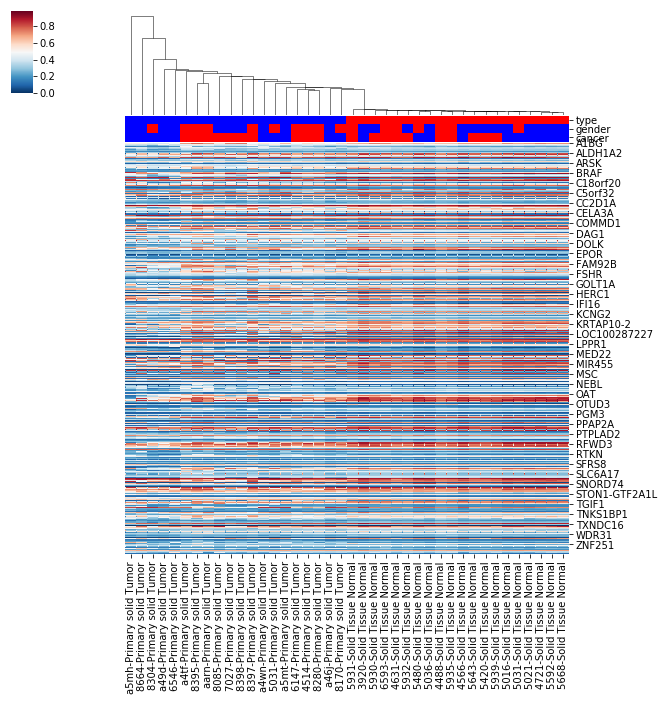

In [6]:
cg = sb.clustermap(methylation_data, metric="correlation", 
                   method="single", 
                   cmap="RdBu_r", row_cluster=False,
                   col_colors=methylation_annot_colors)

## Coclustering

* Похожие образцы должны кластериться вместе.
* В нашем случае, все tissue normal обрацзы друг на друга очень похожи, а все раки друг от друга отличаются.
* Hierarchical clustering rocks!

* Но вообще у иерархической кластеризации есть минус: по визуализации можно оценить только похожесть групп соединённых на дендограмме, а не отдельных образцов.

## Clustering
Разная, поэтому надо обзорно знать, что есть

А именно:

* Hierarchical clustering (Иерархическая кластеризация)
* ** K-means (К-средних): каждый кластер представлен средним **

## K-means

* Изначально определяем число кластеров
* Инициализируем центры кластеров (случайно или нет)
* Для всех точек нашего множества находим ближайший центр: все точки множества разбились на кластеры
* Находим новые центры кластеров
* И по новой

## K-means

<img src="K-means_convergence.gif" width="500px"/>

## K-means

* Мы можем найти гены, которые метилированы в наших образцах похожим образом, и таким образом найти общие паттерны метилирования
* Но перед этим мы можем нормализовать матрицу метилирования
* Все гены метилированы на разном уровне, эта вариация мешает находить изменения между образцами

## Standard score or z-score

Пускать есть выборка $X$ (в нашем случае это значения метилирования для одного гена в разных образцах), тогда мы можем посчитать для каждого образца некоторый Z-score:
$$ Z = \frac{X - \mu}{\sigma} $$
, где $\mu$ -- это среднее значение в $X$, а $\sigma$ -- это среднекватратичная отклонение.

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

km = KMeans(8)

methylation_data_scaled = methylation_data.transform(lambda x: (x - x.mean()) / x.std(), axis=1)

km.fit(methylation_data_scaled)
clusters = km.labels_
order = np.argsort(clusters)
meth_data_ordered = methylation_data_scaled.iloc[order, :]

In [11]:
meth_data_ordered.head()

,6593-Solid Tissue Normal,4488-Solid Tissue Normal,5930-Solid Tissue Normal,5420-Solid Tissue Normal,5939-Solid Tissue Normal,5932-Solid Tissue Normal,4631-Solid Tissue Normal,5931-Solid Tissue Normal,5935-Solid Tissue Normal,5643-Solid Tissue Normal,...,a46j-Primary solid Tumor,a5mh-Primary solid Tumor,a4wn-Primary solid Tumor,a5mt-Primary solid Tumor,6546-Primary solid Tumor,8664-Primary solid Tumor,a49d-Primary solid Tumor,8304-Primary solid Tumor,8170-Primary solid Tumor,5031-Primary solid Tumor
RNF103,1.163496,1.163496,1.163496,0.173287,0.173287,1.163496,0.173287,0.173287,1.163496,0.173287,...,-0.816923,-2.797343,0.173287,-0.816923,-2.797343,1.163496,-0.816923,-0.816923,0.173287,0.173287
CNPY2,1.469485,1.469485,1.469485,0.513723,0.035841,0.991604,0.991604,1.469485,1.469485,0.991604,...,-0.442040,-2.831447,-0.919922,0.035841,-1.397803,-2.353566,-0.919922,-0.919922,-0.442040,-1.397803
CNPY3,0.562486,1.205328,0.562486,0.562486,0.562486,0.562486,-0.080355,0.562486,0.562486,0.562486,...,-0.723197,-0.723197,-0.723197,-1.366038,-2.651721,1.205328,-3.294562,-1.366038,-0.723197,-0.723197
CNPY4,1.705116,1.705116,1.163809,0.081196,0.622503,1.163809,0.622503,1.705116,1.163809,0.081196,...,-0.460111,-0.460111,-0.460111,-1.001417,-1.001417,0.081196,-1.542724,-1.542724,-0.460111,-0.460111
CNTD1,1.830287,0.827390,1.328839,-0.175507,0.325942,0.325942,0.325942,1.328839,0.827390,0.325942,...,-0.175507,-2.682750,-0.676956,-0.175507,-0.676956,-0.676956,-1.178404,-1.679853,-0.676956,-0.175507


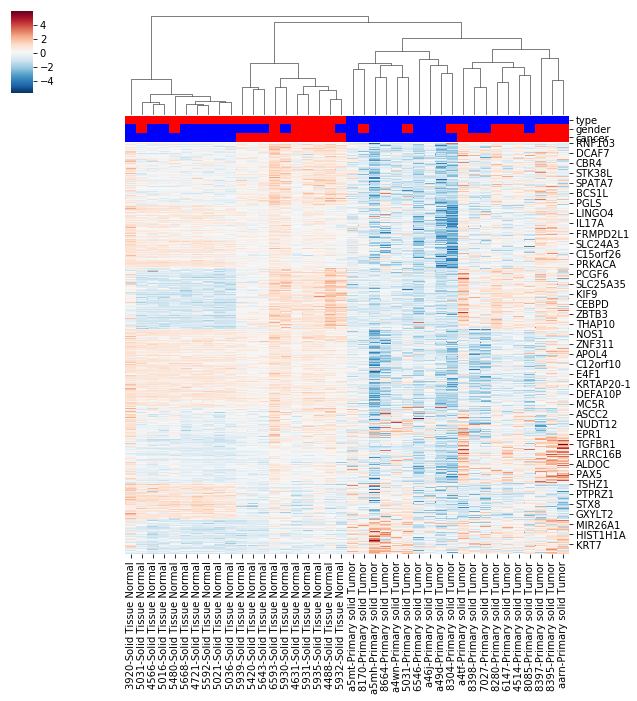

In [12]:
cg = sb.clustermap(meth_data_ordered, metric="correlation", 
                   method="complete",
                   cmap="RdBu_r", row_cluster=False,
                   col_colors=methylation_annot_colors)

## Quiz

* Что такое задача кластеризации?
* Что необходимо знать для кластеризации?

## Dimensionality reduction

Понижение размерности (dimensionality reduction) -- процесс в ходе которого мы понижаем количество рассматриваемых признаков путём получения набора главных признаков, описывающих наш набор данных.

Понижения размерности можно достичь с помощью:

* Feature selection -- мы выбираем признаки из уже существующих признаков, а остальные выкидываем


* Feature extraction -- мы можем определить ("извлечь") новые признаки на основании существующих

## Why reducing dimensionality

* Проще визуализировать


* Найденные компоненты описывают закономерности в наших данных


* Проклятие размерности

## PCA (principal component analysis)

PCA (principal component analysis, метод главных компонент) - один из основных методов понижения размерности. Из-за способа построения главных компонент, данный метод гарантирует наименьшую потерю информацию.

Основная идея алгоритма заключается в том, чтобы последовательно находить компоненты, которые объясняют больше всего вариации

## PCA

<img src="pca_illustration/pca-02.png" width="500px"/>

## PCA

<img src="pca_illustration/pca-03.png" width="500px"/>

## PCA

<img src="pca_illustration/pca-04.png" width="500px"/>

## Performing PCA
В нашем датасете 40 образцов, и они больше чем  20000-мерные - очень большая размерность. 

PCA может помочь нам понизить размреность и визуализировать эти данные.

In [23]:
from sklearn.decomposition import PCA

X = methylation_data.transpose()

pca = PCA(n_components=5)
pca_fit = pca.fit(X)
X_r = pca_fit.transform(X)
print(pca_fit.explained_variance_ratio_)



[0.50108801 0.11562111 0.05879833 0.04475839 0.03235622]


## PCA plot

Text(0.5,1,'PCA of Methylation LUSC/LUAD datasets')

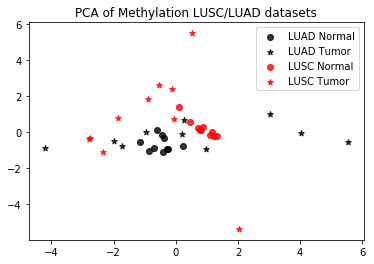

In [26]:
plt.scatter(X_r[0:10, 3], X_r[0:10, 4], marker = "o", color="black", alpha=.8, label="LUAD Normal")
plt.scatter(X_r[10:20, 3], X_r[10:20, 4], marker = "*", color="black", alpha=.8, label="LUAD Tumor")
plt.scatter(X_r[20:30, 3], X_r[20:30, 4], marker = "o", color="red", alpha=.8, label="LUSC Normal")
plt.scatter(X_r[30:40, 3], X_r[30:40, 4], marker = "*", color="red", alpha=.8, label="LUSC Tumor")

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Methylation LUSC/LUAD datasets')